In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\robert.chan\Desktop\store a data.csv")

data = data[data['transaction_date'] > '2023-01-01']

data.head()

#remove all transactions with one item only
data = data[data['transaction_id'].isin(data.groupby('transaction_id').filter(lambda x: len(x) > 1)['transaction_id'])]


C:\Users\robert.chan\AppData\Local\Temp\7\ipykernel_162828\3649464655.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\robert.chan\Desktop\store a data.csv")


In [2]:
data.head()

,store_id,transaction_date_time,transaction_date,transaction_id,transaction_line_id,sales_heading,description,barcode,quantity,sales_value
0,Store A,2023-04-13 02:01:13.000,2023-04-13,4085210,7010728,14,RED BULL 473ML,9.002490e+12,1.0,2.99
2,Store A,2023-04-13 02:06:29.000,2023-04-13,4085212,7010730,14,DR.PEPPER 500ML,5.000193e+12,1.0,1.97
3,Store A,2023-04-13 02:06:29.000,2023-04-13,4085212,7010731,55,FAZILA TAND CHK/MAYO PKT,5.060100e+12,1.0,3.23
5,Store A,2023-04-13 02:13:06.000,2023-04-13,4085214,7010732,20,CAD.CHOC.FINGERS 114G,7.241716e+10,1.0,1.99
6,Store A,2023-04-13 02:13:06.000,2023-04-13,4085214,7010733,41,CARD CON.EVERYDAY CARD D,5.026310e+12,1.0,2.49


In [3]:
# Create a flag to indicate if a transaction contains fuel
data['contains_fuel'] = data.groupby('transaction_id')['description'].transform(lambda x: (x == 'Fuel').any())

# Split data into two datasets based on the new contains_fuel flag: with fuel and without fuel
data_with_fuel = data[data['contains_fuel']]
data_without_fuel = data[~data['contains_fuel']]
all_data = data


# Check the number of transactions in each dataset again
num_transactions_with_fuel = data_with_fuel['transaction_id'].nunique()
num_transactions_without_fuel = data_without_fuel['transaction_id'].nunique()
num_transactions_all_data = all_data['transaction_id'].nunique()

num_transactions_with_fuel, num_transactions_without_fuel, num_transactions_all_data




(69856, 242285, 312141)

In [4]:
# Check for missing values in both datasets
missing_values_with_fuel = data_with_fuel.isnull().sum()
missing_values_without_fuel = data_without_fuel.isnull().sum()
missing_values_all_data = all_data.isnull().sum()

# Check for duplicate rows in both datasets
duplicate_rows_with_fuel = data_with_fuel.duplicated().sum()
duplicate_rows_without_fuel = data_without_fuel.duplicated().sum()
duplicate_rows_all_data = all_data.duplicated().sum()

missing_values_with_fuel, missing_values_without_fuel, duplicate_rows_with_fuel, duplicate_rows_without_fuel, duplicate_rows_all_data, missing_values_all_data


(store_id                   0
 transaction_date_time      0
 transaction_date           0
 transaction_id             0
 transaction_line_id        0
 sales_heading              0
 description                0
 barcode                  258
 quantity                   0
 sales_value                0
 contains_fuel              0
 dtype: int64,
 store_id                    0
 transaction_date_time       0
 transaction_date            0
 transaction_id              0
 transaction_line_id         0
 sales_heading               0
 description                 0
 barcode                  1662
 quantity                    0
 sales_value                 0
 contains_fuel               0
 dtype: int64,
 0,
 0,
 0,
 store_id                    0
 transaction_date_time       0
 transaction_date            0
 transaction_id              0
 transaction_line_id         0
 sales_heading               0
 description                 0
 barcode                  1920
 quantity                    0
 sales_v

In [5]:
# Check data types of columns for both datasets
data_types_with_fuel = data_with_fuel.dtypes
data_types_without_fuel = data_without_fuel.dtypes
data_types_all_data = all_data.dtypes

data_types_with_fuel, data_types_without_fuel, data_types_all_data


(store_id                  object
 transaction_date_time     object
 transaction_date          object
 transaction_id             int64
 transaction_line_id        int64
 sales_heading             object
 description               object
 barcode                  float64
 quantity                 float64
 sales_value              float64
 contains_fuel               bool
 dtype: object,
 store_id                  object
 transaction_date_time     object
 transaction_date          object
 transaction_id             int64
 transaction_line_id        int64
 sales_heading             object
 description               object
 barcode                  float64
 quantity                 float64
 sales_value              float64
 contains_fuel               bool
 dtype: object,
 store_id                  object
 transaction_date_time     object
 transaction_date          object
 transaction_id             int64
 transaction_line_id        int64
 sales_heading             object
 description    

In [6]:
# Check number of unique values in categorical columns for both datasets
unique_values_with_fuel = data_with_fuel[['store_id', 'sales_heading', 'description', 'barcode']].nunique()
unique_values_without_fuel = data_without_fuel[['store_id', 'sales_heading', 'description', 'barcode']].nunique()
unique_values_all_data = all_data[['store_id', 'sales_heading', 'description', 'barcode']].nunique()

unique_values_with_fuel, unique_values_without_fuel, unique_values_all_data


(store_id            2
 sales_heading      86
 description      5066
 barcode          4979
 dtype: int64,
 store_id            2
 sales_heading      77
 description      6146
 barcode          6032
 dtype: int64,
 store_id            2
 sales_heading      90
 description      6217
 barcode          6089
 dtype: int64)

In [7]:
# Generate summary statistics for numerical columns for both datasets
numerical_summary_with_fuel = data_with_fuel[['transaction_id', 'transaction_line_id', 'quantity', 'sales_value']].describe()
numerical_summary_without_fuel = data_without_fuel[['transaction_id', 'transaction_line_id', 'quantity', 'sales_value']].describe()
numerical_summary_all_data = all_data[['transaction_id', 'transaction_line_id', 'quantity', 'sales_value']].describe()

numerical_summary_with_fuel, numerical_summary_without_fuel, numerical_summary_all_data


(       transaction_id  transaction_line_id       quantity    sales_value
 count    2.217060e+05         2.217060e+05  221706.000000  221706.000000
 mean     3.854158e+06         4.664255e+06      10.137669      16.795040
 std      3.044229e+05         2.308351e+06      26.275285      42.486725
 min      3.370491e+06         1.582509e+06       0.000000      -1.580000
 25%      3.561624e+06         1.695892e+06       1.000000       1.250000
 50%      3.957500e+06         5.254876e+06       1.000000       2.690000
 75%      4.129253e+06         6.939350e+06      11.800000      20.000000
 max      4.316820e+06         7.404617e+06     500.000000     879.500000,
        transaction_id  transaction_line_id       quantity    sales_value
 count    8.197680e+05         8.197680e+05  819768.000000  819768.000000
 mean     3.868706e+06         6.263266e+06       1.049190       2.275221
 std      3.059564e+05         9.297805e+05       0.381676       3.048587
 min      3.370474e+06         4.9776

In [8]:
# Check the range of dates present in both datasets
date_range_with_fuel = data_with_fuel['transaction_date'].min(), data_with_fuel['transaction_date'].max()
date_range_without_fuel = data_without_fuel['transaction_date'].min(), data_without_fuel['transaction_date'].max()
date_range_all_data = all_data['transaction_date'].min(), all_data['transaction_date'].max()

date_range_with_fuel, date_range_without_fuel, date_range_all_data


(('2023-01-02', '2023-09-04'),
 ('2023-01-02', '2023-09-04'),
 ('2023-01-02', '2023-09-04'))

In [9]:
# Identify any missing dates in both datasets
all_dates = pd.date_range(start=date_range_all_data[0], end=date_range_all_data[1])

missing_dates_with_fuel = all_dates.difference(data_with_fuel['transaction_date'].unique())
missing_dates_without_fuel = all_dates.difference(data_without_fuel['transaction_date'].unique())
missing_dates_all_data = all_dates.difference(all_data['transaction_date'].unique())

missing_dates_with_fuel, missing_dates_without_fuel, missing_dates_all_data


(DatetimeIndex([], dtype='datetime64[ns]', freq=None),
 DatetimeIndex([], dtype='datetime64[ns]', freq=None),
 DatetimeIndex([], dtype='datetime64[ns]', freq=None))

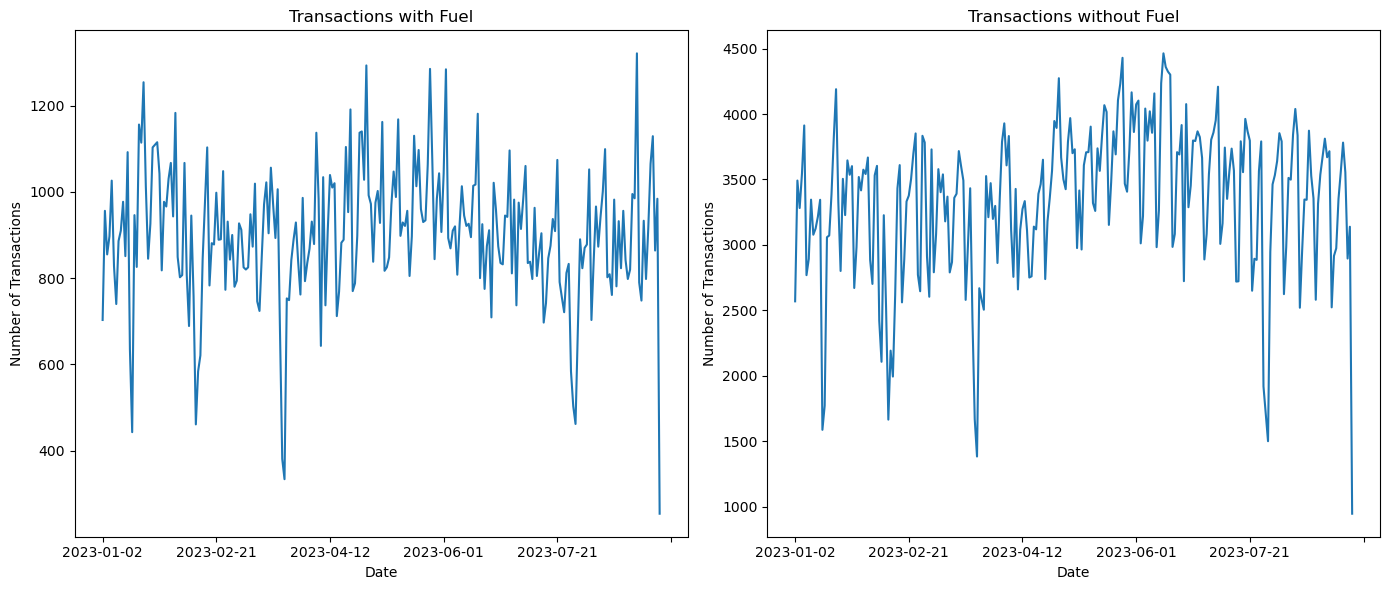

In [10]:
import matplotlib.pyplot as plt

# Count the number of transactions per date for both datasets
date_counts_with_fuel = data_with_fuel.groupby('transaction_date').size()
date_counts_without_fuel = data_without_fuel.groupby('transaction_date').size()

# Plot the frequency of transactions for both datasets
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
date_counts_with_fuel.plot(title="Transactions with Fuel")
plt.ylabel("Number of Transactions")
plt.xlabel("Date")

plt.subplot(1, 2, 2)
date_counts_without_fuel.plot(title="Transactions without Fuel")
plt.ylabel("Number of Transactions")
plt.xlabel("Date")

plt.tight_layout()
plt.show()


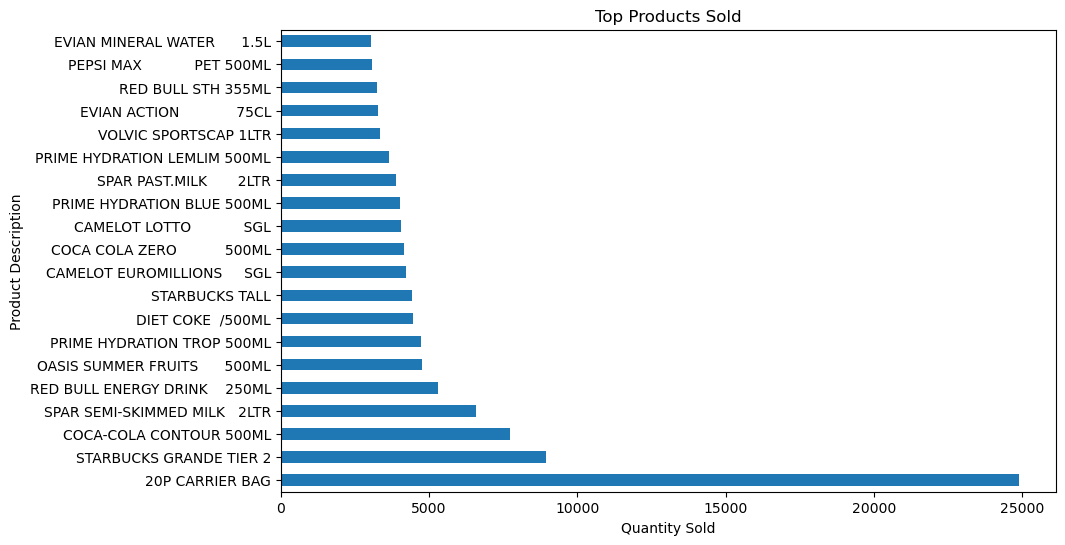

In [11]:
# visualise the top products sold in all_data and exclude fuel and 20p carrier bag
# top_products = all_data[~all_data['description'].isin(['Fuel', '20p Carrier Bag'])].groupby('description')['quantity'].sum().sort_values(ascending=False).head(20)

top_products = data_without_fuel.groupby('description')['quantity'].sum().sort_values(ascending=False).head(20)
top_products.plot(kind='barh', figsize=(10, 6), title="Top Products Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.show()

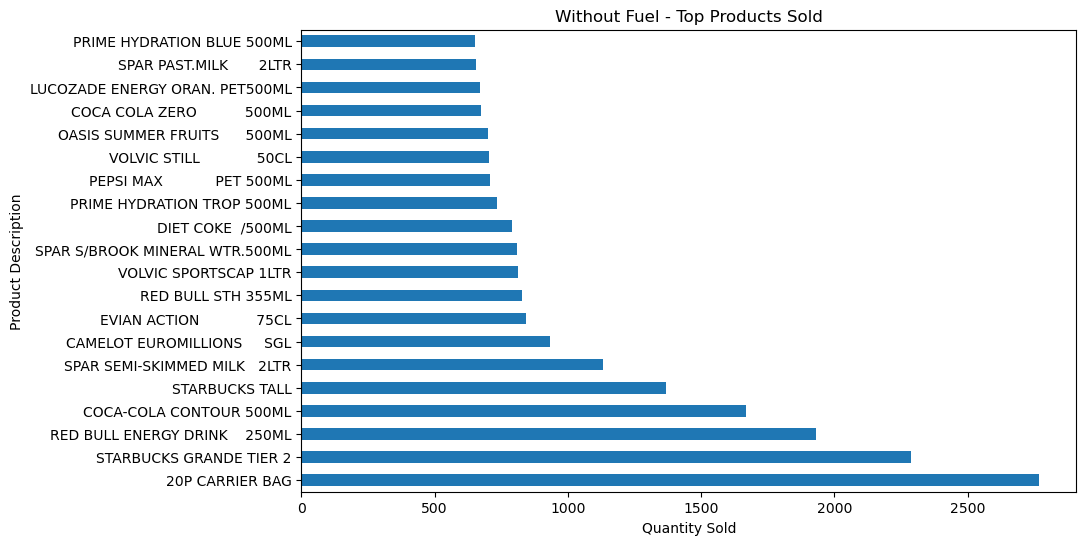

In [12]:
#show the top products excluding fuel
fuel_top_products = data_with_fuel[~data_with_fuel['description'].isin(['Fuel'])].groupby('description')['quantity'].sum().sort_values(ascending=False).head(20)
fuel_top_products.plot(kind='barh', figsize=(10, 6), title="Without Fuel - Top Products Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.show()

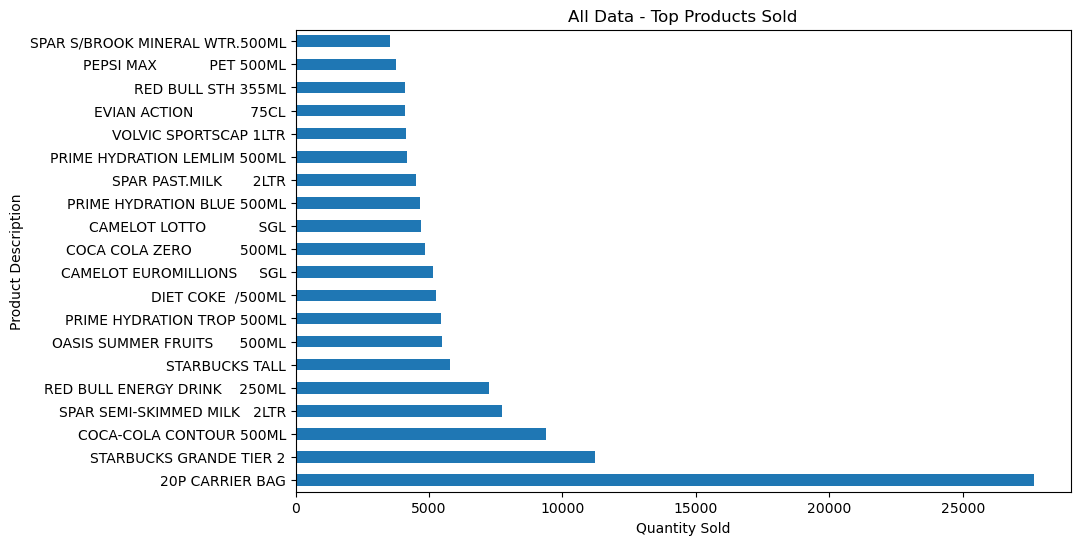

In [13]:
#show top products from all_data
all_data_top_products = all_data[~all_data['description'].isin(['Fuel'])].groupby('description')['quantity'].sum().sort_values(ascending=False).head(20)
all_data_top_products.plot(kind='barh', figsize=(10, 6), title="All Data - Top Products Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.show()

In [14]:
#find negative dimensions in all_data
all_data[all_data['quantity'] < 0]

,store_id,transaction_date_time,transaction_date,transaction_id,transaction_line_id,sales_heading,description,barcode,quantity,sales_value,contains_fuel


In [22]:
# Transforming the data for basket analysis

# Creating a matrix with transaction_id as index and product description as columns
basket_matrix = data_with_fuel.groupby(['transaction_id', 'description'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')

# Convert the quantity values to 1 (for present) and 0 (for not present)
basket_sets = basket_matrix.applymap(lambda x: 1 if x > 0 else 0)

basket_sets.head()


description,(HF)1 PACK KN95 MASK V2,0.3 GREEN APPLE,0.3 PEAR DROP,0.3 SEX ON THE BEACH,0.3 SHERBET LEMON,0.6 GREEN APPLE,0.6 PEAR DROP,0.6 SEX ON THE BEACH,1 USB CAR CHARGER WITH LED,1.0 GREEN APPLE,...,YPS TOM RED PEPPER SOUP 7600G,ZED JAWBREAKER BLUE RAZZ,ZED STRAWBERRY JAWBREAKER 6 BA,ZIG ZAG GREEN PKT,ZOFLORA ASSORTED,"£120,000 RICHER",£120K RICHER,£2 MILLION BLUE,£3 CASHWORD EXTRA,"£90,000 NEON 9'S"
transaction_id,,,,,,,,,,,,,,,,,,,,,
3370491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3370527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3370532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3370542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3370545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Import the apriori function
from mlxtend.frequent_patterns import apriori

# Run the apriori algorithm with a minimum support of 0.01
frequent_itemsets = apriori(basket_sets, min_support=0.003, use_colnames=True)

# Print the frequent itemsets
frequent_itemsets


C:\Users\robert.chan\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.038708,(20P CARRIER BAG)
1,0.005540,(B&H BLUE K/S TPD 20'S)
2,0.003192,(BOUNTY MILK 57G)
3,0.004280,(BOUNTY TRIO 85G)
4,0.003164,(CAD.MINI EGGS BAG C/STRIP90G)
...,...,...
150,0.003908,"(WRIGLEYS AIRWAVES MENTHOL10PCE, Fuel)"
151,0.004037,"(WRIGLEYS EXTRA BUBBLEMINT10PCE, Fuel)"
152,0.004796,"(WRIGLEYS EXTRA COOL BRZE.10'S, Fuel)"
153,0.005955,"(WRIGLEYS EXTRA S/F P/MINT10PCE, Fuel)"


In [28]:
#get the association rules
from mlxtend.frequent_patterns import association_rules

# Run the association rules algorithm with a minimum threshold of 0.7 for the lift metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)

# Print the association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(20P CARRIER BAG),(Fuel),0.038708,0.960991,0.034900,0.901627,0.938226,-0.002298,0.396541,-0.064102
1,(Fuel),(20P CARRIER BAG),0.960991,0.038708,0.034900,0.036317,0.938226,-0.002298,0.997519,-0.627955
2,(B&H BLUE K/S TPD 20'S),(Fuel),0.005540,0.960991,0.005425,0.979328,1.019081,0.000102,1.887052,0.018828
3,(Fuel),(B&H BLUE K/S TPD 20'S),0.960991,0.005540,0.005425,0.005646,1.019081,0.000102,1.000106,0.479995
4,(BOUNTY MILK 57G),(Fuel),0.003192,0.960991,0.003063,0.959641,0.998595,-0.000004,0.966552,-0.001409
...,...,...,...,...,...,...,...,...,...,...
143,(Fuel),(WRIGLEYS EXTRA COOL BRZE.10'S),0.960991,0.004924,0.004796,0.004990,1.013367,0.000063,1.000066,0.338158
144,(WRIGLEYS EXTRA S/F P/MINT10PCE),(Fuel),0.006198,0.960991,0.005955,0.960739,0.999738,-0.000002,0.993578,-0.000264
145,(Fuel),(WRIGLEYS EXTRA S/F P/MINT10PCE),0.960991,0.006198,0.005955,0.006197,0.999738,-0.000002,0.999998,-0.006683
146,(Fuel),(WRIGLEYS EXTRA S/F S/MINT10PCE),0.960991,0.004595,0.004423,0.004603,1.001692,0.000007,1.000008,0.043292


In [21]:
# Filter the DataFrame to only show the rules with a single product in the antecedents
rules_single_product = rules[rules['antecedents'].apply(lambda x: len(x) == 1)]

# Print the association rules
rules_single_product[:20]





,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(20P CARRIER BAG),(Fuel),0.086631,0.215066,0.007811,0.090159,0.419217,-0.010821,0.862716,-0.602670
1,(Fuel),(20P CARRIER BAG),0.215066,0.086631,0.007811,0.036317,0.419217,-0.010821,0.947790,-0.638335
2,(Fuel),(STARBUCKS GRANDE TIER 2),0.215066,0.031326,0.006289,0.029241,0.933465,-0.000448,0.997853,-0.083248
3,(STARBUCKS GRANDE TIER 2),(Fuel),0.031326,0.215066,0.006289,0.200757,0.933465,-0.000448,0.982096,-0.068539
